In [45]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def load_dataset(with_racoons: bool = False):
    # Generate dates for the past 30 days
    end_date = datetime.now()
    dates = [end_date - timedelta(days=i) for i in range(30)]
    dates.reverse()

    # Generate fake data for cats and dogs posts with more variability and overlap
    np.random.seed(42)  # For reproducibility

    # Varying the lambda parameter to create more overlap and variability
    cat_posts = np.random.poisson(lam=np.random.randint(3000, 8000, 30), size=30)  # Random between 30k to 80k posts per day
    dog_posts = np.random.poisson(lam=np.random.randint(3500, 8500, 30), size=30)  # Random between 35k to 85k posts per day
    # Slow growth for the first 22 days, then sharp increase in the last 8 days
    racoon_posts_first_22_days = np.random.poisson(lam=np.random.randint(20, 1000, 22), size=22)  # Gradual growth
    racoon_posts_last_8_days = np.random.poisson(lam=np.random.randint(300, 20000, 8), size=8)  # Sharp increase

    # Combine the two parts
    racoon_posts = np.concatenate((racoon_posts_first_22_days, racoon_posts_last_8_days))

    # Create a DataFrame and calculate cumulative sums
    data = {
        'Date': dates,
        'Cat Posts': cat_posts.cumsum(),
        'Dog Posts': dog_posts.cumsum(),
    }
    if with_racoons:
        data['Raccoon Posts'] = racoon_posts.cumsum()

    df = pd.DataFrame(data)
    return df


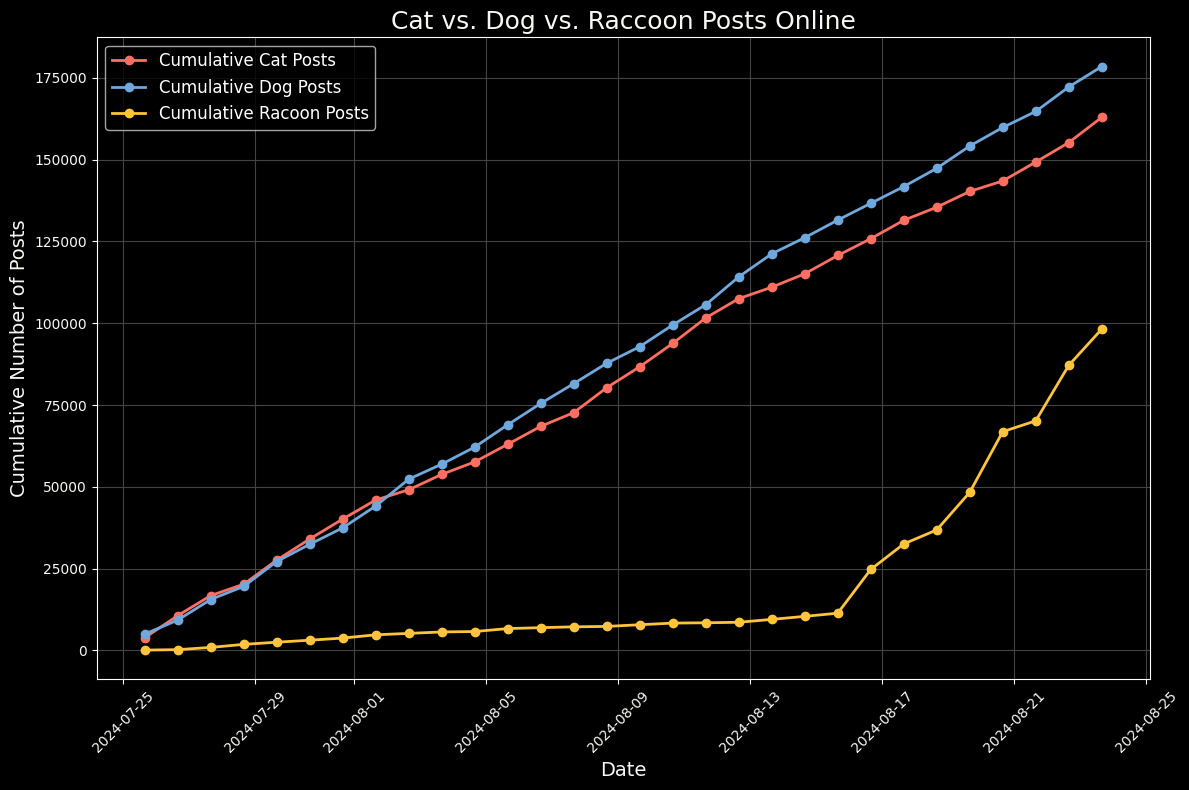

In [48]:

df = load_dataset(with_racoons=True)
# Plot the data
# Set a dark theme for the plot
plt.style.use('dark_background')

df = load_dataset(with_racoons=True)
# Plot the data
plt.figure(figsize=(12, 8))
plt.plot(df['Date'], df['Cat Posts'], marker='o', linestyle='-', color='#ff6f61', label='Cumulative Cat Posts', linewidth=2)
plt.plot(df['Date'], df['Dog Posts'], marker='o', linestyle='-', color='#6fa8dc', label='Cumulative Dog Posts', linewidth=2)
plt.plot(df['Date'], df['Raccoon Posts'], marker='o', linestyle='-', color='#FFC43B', label='Cumulative Racoon Posts', linewidth=2)
plt.title('Cat vs. Dog vs. Raccoon Posts Online', fontsize=18, color='#f8f8f2')
plt.xlabel('Date', fontsize=14, color='#f8f8f2')
plt.ylabel('Cumulative Number of Posts', fontsize=14, color='#f8f8f2')
plt.legend(fontsize=12)
plt.grid(True, color='#444444')
plt.xticks(rotation=45, color='#f8f8f2')
plt.yticks(color='#f8f8f2')
plt.tight_layout()
plt.show()
